# Sentiment analysis of people before coronavirus outbreak

In [1]:
import string

from collections import Counter

import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

import nltk

import matplotlib.pyplot as plt

In [2]:
def get_tweets():
    import GetOldTweets3 as got 
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#Coronavirus') \
        .setSince("2020-01-01") \
        .setUntil("2020-02-01") \
        .setMaxTweets(10000)
    
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
   
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [3]:

text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text


lower_case = text.lower()


cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))


tokenized_words = cleaned_text.split()

In [4]:
text_tweets

[['Me veré muy dramático si a partir del lunes uso mascarilla para ir a u? #coronavirus'],
 ['Les endroits publics à forte densité chinoise tel les bibliothèques comme à #Brossard devrait être interdit d’accès s’ils ont été en chine lors des derniers 15 voir 30 jours. #Coronavirus CC : #DoreenAssaad @Ad_Assaad'],
 ['El “lado humano” del #CoronaVirus '],
 ['#savenatuna #coronavirus #tolakkarantinawniwuhandinatuna @jokowi'],
 ['US bars entry to foreigners who traveled to China http://bit.ly/2Oj0amd #coronavirus'],
 ['#Emergencias #Coronavirus Y mientras.... "Il Capo" '],
 ['NEW: Man tests positive for novel #coronavirus in Santa Clara County, the first reported in the Bay Area and the seventh in the nation '],
 ['Mira la transmisión de @RayoVen: #PUENTE #SUPERBOWL #CANDELARIA #Brexit #Coronavirus #Tamales #NFL #FinDeSemana'],
 ['【ホワイトハウス】アメリカ合衆国、新型コロナウィルス問題を公衆衛生緊急事態宣言 【２月１日】 アザー保健福祉長官「アメリカ国民の生命・財産を守る為、トランプ政権は２０１９新型コロナウィルス感染対策に関して、私は公衆衛生緊急宣言に署名」 #Coronavirus 公式：https://www.youtube.com/wat

In [5]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

final_words = [word for word in tokenized_words if word not in stop_words]

In [6]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)



Counter({' sad': 14, ' fearful': 13, ' angry': 13, ' happy': 13, ' attracted': 10, ' powerless': 8, ' singled out': 5, ' esteemed': 5, ' attached': 5, ' fearless': 5, ' adequate': 5, ' entitled': 5, ' surprise': 4, ' loved': 4, ' average': 3, ' focused': 3, ' free': 3, ' alone': 3, ' cheated': 2, ' apathetic': 2, ' hated': 2, ' belittled': 2, ' ecstatic': 2, ' lost': 2, ' anxious': 2, ' bored': 1, ' safe': 1, ' demoralized': 1, ' embarrassed': 1, ' lustful': 1, ' obsessed': 1, ' burdened': 1, ' independent': 1})


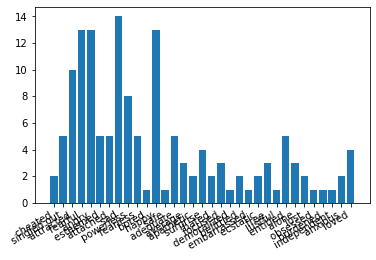

In [7]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

print (sia.polarity_scores(str(text_tweets)))

{'neg': 0.076, 'neu': 0.87, 'pos': 0.054, 'compound': -1.0}


In [9]:
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n          Negative Sentiment      ")
        
    elif score['neg'] < score['pos']:
        print("\n          Positive Sentiment      ")
    else:
        print("Neutral Sentiment")


          Negative Sentiment      


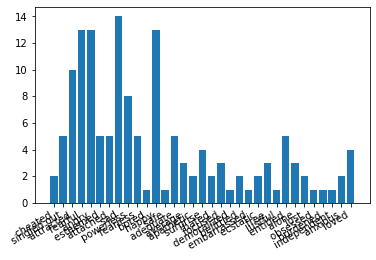

In [10]:
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

# Sentiment analysis of people after coronavirus outbreak

In [11]:
def get_tweets():
    import GetOldTweets3 as got   
    tweetsearch = got.manager.TweetCriteria().setQuerySearch('#Coronavirus') \
        .setSince("2020-04-01") \
        .setUntil("2020-05-01") \
        .setMaxTweets(10000)
    tweets = got.manager.TweetManager.getTweets(tweetsearch)
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [12]:
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

lower_case = text.lower()

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

tokenized_words = cleaned_text.split()

In [13]:
text_tweets

[['Why are you all so late to the @BorisJohnson is an egomaniac, lazy, drunkard, sociopathic, feckless bastard party? Ive put the dishwasher on, hoovered up and hoping that your not crashing on my settee. #BorisJohnson #COVID19 #coronavirus https://twitter.com/mrjamesob/status/1255902627356966915'],
 ['This is just wrong! China asked overseas Chinese to help stockpile #PPE while they downplayed the seriousness of the #coronavirus in mid-January. EVIL! '],
 ['Essa é uma boa hora de vivermos um Residet Evil #memesbr #coronavírus https://www.instagram.com/p/B_n9Rn6npbP/?igshid=9176eh8u57fg'],
 [' New Podcast! "First wave #CoronaVirus Defaults in July | Lee Honish 858-663-2537 | David Bartels 805-413-8000" on @Spreaker #805_413_8000 #858_663_2537 #bartels #coronavirus #david #defaults #first #honish #in #july #lee #wave'],
 ['Usa: si fermano #allevamentiintensivi e impianti di lavorazione, focolai di #coronavirus con strage di dipendenti ammalati. Trump indaga il perché? No, li precetta: s

In [14]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

final_words = [word for word in tokenized_words if word not in stop_words]

In [15]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)



Counter({' happy': 21, ' sad': 19, ' fearful': 15, ' powerless': 14, ' attracted': 12, ' angry': 11, ' attached': 9, ' adequate': 8, ' loved': 5, ' fearless': 5, ' hated': 5, ' belittled': 5, ' esteemed': 5, ' anxious': 4, ' alone': 4, ' average': 3, ' surprise': 3, ' focused': 3, ' free': 3, ' singled out': 3, ' independent': 3, ' cheated': 2, ' embarrassed': 2, ' bored': 2, ' safe': 2, ' obsessed': 2, ' lustful': 2, ' entitled': 2, ' lost': 2, ' codependent': 2, ' derailed': 2, ' ecstatic': 1, ' apathetic': 1})


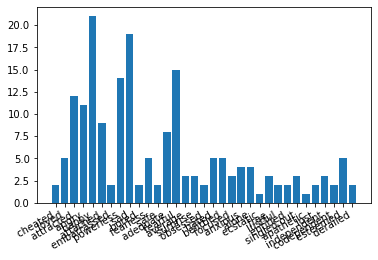

In [16]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [17]:
sia = SentimentIntensityAnalyzer()

print (sia.polarity_scores(str(text_tweets)))

{'neg': 0.07, 'neu': 0.863, 'pos': 0.067, 'compound': -1.0}


In [18]:
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n          Negative Sentiment      ")
        
    elif score['neg'] < score['pos']:
        print("\n          Positive Sentiment      ")
    else:
        print("Neutral Sentiment")

Neutral Sentiment


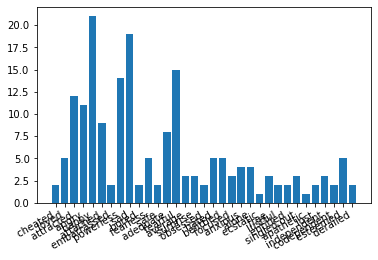

In [19]:
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()